In [1]:
import pandas as pd
df = pd.read_csv('full_dataset.csv')

In [2]:
df.head()

,filename,corpus,genre,period,region,text,title,year
0,HUMA_P3_WMD_1777_HomburgRAW.txt,manchester,HUMA,P3,WMD,Nachricht von den Alterthu&#868;mern in dem Ge...,Homburg,1777
1,NEWS_P3_NoD_1786_wolfenbuettel1.txt,manchester,NEWS,P3,NoD,"Zeitung\r\nfür\r\nStädte, Flecken und Dörfer,\...",wolfenbuettel1,1786
2,NARR_P1_NoD_1658_MorgenlaendischRAW.txt,manchester,NARR,P1,NoD,Das zwey vnd dreysigste Capitel.\n Des Pr...,Morgenlaendisch,1658
3,SCIE_P1_WMD_1680_EpidemicaRAW.txt,manchester,SCIE,P1,WMD,Das XX. Capitel.\n Von den Schnecken.\n ...,Epidemica,1680
4,NEWS_P2_WMD_1701_hanau2.txt,manchester,NEWS,P2,WMD,Extraordinari Europæische Zeitung. 1701. Num. ...,hanau2,1701


In [3]:
df.shape

(974, 8)

# Plot genre distribution

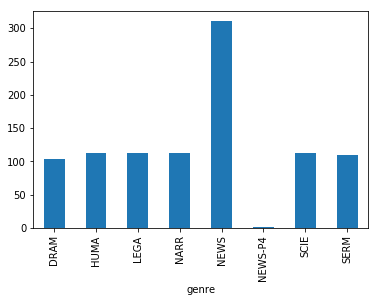

In [5]:
df.groupby('genre').title.count().plot(kind='bar')

=> One text has an invalid genre this should occur while creating the dataset.

=> Every genre except news is somewhat balanced. Maybe we should try applying class weights.

# Plot region distribution

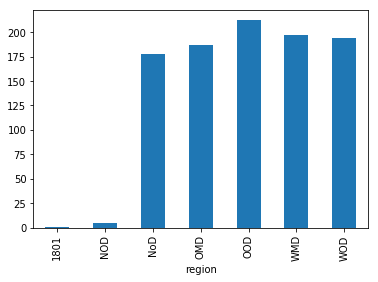

In [6]:
df.groupby('region').title.count().plot(kind='bar')

=> 1801 is an invalid entry. We should really fix the dataset creation.

CHECK: Is NOD similar to NoD?

# Plot number of text per year

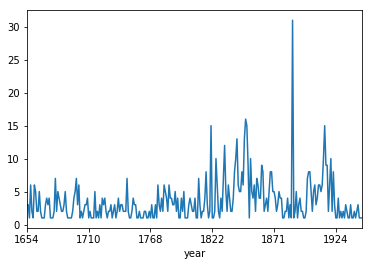

In [7]:
df.groupby('year').title.count().plot()

In [8]:
df.year.value_counts().describe()

count    272.000000
mean       3.580882
std        3.280390
min        1.000000
25%        1.000000
50%        3.000000
75%        5.000000
max       31.000000
Name: year, dtype: float64

In [12]:
df_1886 = df[df.year == df.year.value_counts().idxmax()]
df_1886

,filename,corpus,genre,period,region,text,title,year
524,NEWS_P5_NoD_1886_Lippische Landeszeitung Detmo...,innsbruck,NEWS,P5,NoD,Aus dem Fürstenthum Lippe und Umgegend.\nDetmo...,Lippische Landeszeitung Detmold,1886
531,NEWS_P5_WMD_1886_Gie˙ener Anzeiger_2RAW.txt,innsbruck,NEWS,P5,WMD,"Lokales.\nGießen, 4. August. Die bei dem gestr...",Gie˙ener Anzeiger,1886
533,NEWS_P5_WMD_1886_Hessische Morgenzeitung_1RAW.txt,innsbruck,NEWS,P5,WMD,Lokales.\n— Am 5. August er. von Morgens 9 Uhr...,Hessische Morgenzeitung,1886
537,NEWS_P5_WMD_1886_Saar- und Mosel-Zeitung_RAW.txt,innsbruck,NEWS,P5,WMD,"Lokales.\nTrier, 3. Aug. Jn den Concursverfahr...",Saar- und Mosel-Zeitung,1886
542,NEWS_P5_NoD_1886_WestfÑlisch Schaumburgische Z...,innsbruck,NEWS,P5,NoD,"Aus Westfalen, Hessen und Umgegend.\nOeynhause...",WestfÑlisch Schaumburgische Zeitung,1886
553,NEWS_P5_OMD_1886_VogtlÑndischer Anzeiger Plaue...,innsbruck,NEWS,P5,OMD,Sächsische und örtliche Angelegenheiten.\nPlau...,VogtlÑndischer Anzeiger Plauen,1886
561,NEWS_P5_NoD_1886_Wilhelmshavener Tageblatt_RAW...,innsbruck,NEWS,P5,NoD,"Lokales.\n* Wilhelmshaven, 5. August. In Würdi...",Wilhelmshavener Tageblatt,1886
567,NEWS_P5_OMD_1886_Breslauer Zeitung_3RAW.txt,innsbruck,NEWS,P5,OMD,"Provinzial-Zeitung.\nBreslau, 6. August.\nIn e...",Breslauer Zeitung,1886
605,NEWS_P5_NoD_1886_Posener Zeitung_RAW.txt,innsbruck,NEWS,P5,NoD,"Lokales und Provinzielles.\nPosen, den 3. Augu...",Posener Zeitung,1886
616,NEWS_P5_WOD_1886_Neue ZÅrcher Zeitung_1RAW.txt,innsbruck,NEWS,P5,WOD,Unglücksfälle und Verbrechen.\n— In der Spinne...,Neue ZÅrcher Zeitung,1886


# Plot genre by region

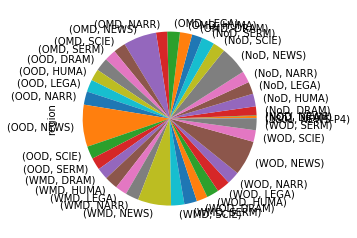

In [13]:
df.groupby(['region', 'genre']).region.count().plot(kind='pie')

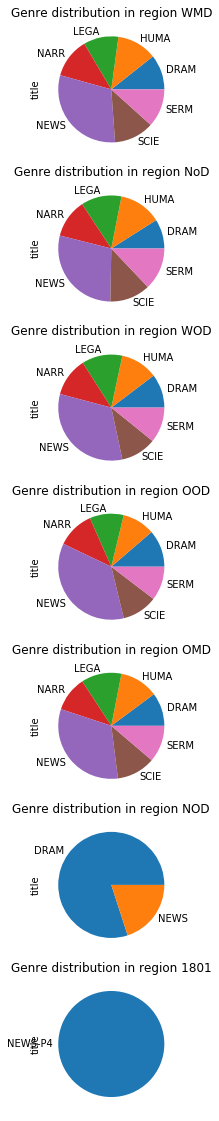

In [14]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(len(df.region.unique()), figsize=(20, 20))
for i, region in enumerate(df.region.unique()):
    df[df.region == region].groupby('genre').title.count().plot(kind='pie',
                                                                ax=axs[i],
                                                                grid=True,
                                                                title=f'Genre distribution in region {region}')

# Plot genre by period

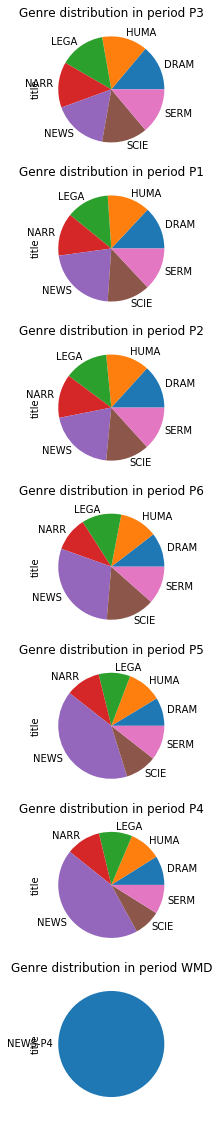

In [21]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(len(df.period.unique()), figsize=(20, 20))
for i, period in enumerate(df.period.unique()):
    df[df.period == period].groupby('genre').title.count().plot(kind='pie',
                                                                ax=axs[i],
                                                                grid=True,
                                                                legend=False,
                                                                title=f'Genre distribution in period {period}')

In [22]:
df.groupby(['period', 'region', 'genre']).describe()

filename         \
                         count unique   
period region genre                     
P1     NoD    DRAM           3      3   
              HUMA           3      3   
              LEGA           3      3   
              NARR           3      3   
              NEWS           4      4   
              SCIE           3      3   
              SERM           3      3   
       OMD    DRAM           3      3   
              HUMA           3      3   
              LEGA           3      3   
              NARR           3      3   
              NEWS           5      5   
              SCIE           3      3   
              SERM           3      3   
       OOD    DRAM           3      3   
              HUMA           3      3   
              LEGA           3      3   
              NARR           3      3   
              NEWS           6      6   
              SCIE           3      3   
              SERM           3      3   
       WMD    DRAM           3      3   
              HUMA           3      3   
              LEGA           3      3   
              NARR           3      3   
              NEWS           5      5   
              SCIE           3      3   
              SERM           3      3   
       WOD    DRAM           3      3   
              HUMA           3      3   
...                        ...    ...   
P6     NoD    SERM           4      4   
       OMD    DRAM           2      2   
              HUMA           3      3   
              LEGA           5      5   
              NARR           3      3   
              NEWS           9      9   
              SCIE           5      5   
              SERM           4      4   
       OOD    DRAM           5      5   
              HUMA           4      4   
              LEGA           4      4   
              NARR           3      3   
              NEWS          14     14   
              SCIE           6      6   
              SERM           4      4   
       WMD    DRAM           4      4   
              HUMA           6      6   
              LEGA           4      4   
              NARR           6      6   
              NEWS          14     14   
              SCIE           7      7   
              SERM           5      5   
       WOD    DRAM           4      4   
              HUMA           4      4   
              LEGA           4      4   
              NARR           3      3   
              NEWS          10     10   
              SCIE           4      4   
              SERM           4      4   
WMD    1801   NEWS-P4        1      1   

                                                                               \
                                                                     top freq   
period region genre                                                             
P1     NoD    DRAM                      DRAM_P1_NoD_1699_EuridiceRAW.txt    1   
              HUMA              HUMA_P1_NoD_1674_NaturalienKammerRAW.txt    1   
              LEGA                       LEGA_P1_NoD_1657_LuebeckRAW.txt    1   
              NARR                     NARR_P1_NoD_1682_MandorellRAW.txt    1   
              NEWS                           NEWS_P1_NoD_1698_altona.txt    1   
              SCIE                     SCIE_P1_NoD_1684_DurchfallRAW.txt    1   
              SERM                       SERM_P1_NoD_1666_ErbteilRAW.txt    1   
       OMD    DRAM                      DRAM_P1_OMD_1657_CardenioRAW.txt    1   
              HUMA                       HUMA_P1_OMD_1680_BerichtRAW.txt    1   
              LEGA                      LEGA_P1_OMD_1680_DreszdenRAW.txt    1   
              NARR                     NARR_P1_OMD_1671_RuebezahlRAW.txt    1   
              NEWS                          NEWS_P1_OMD_1684_breslau.txt    1   
              SCIE                    SCIE_P1_OMD_1672_HandwerckeRAW.txt    1   
              SERM                 SERM_P1_OMD_1680_SursumDeorsumRAW.txt    1   
       OOD    DRAM  